# 텍스트 마이닝 - 한국어능력평가원
### Sample Data 전처리 및 Stopwords 제거

In [19]:
# ## Setting
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install xlrd
!pip3 install openpyxl ### xlsx to df

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Nanum Gothic')
mpl.rcParams['axes.unicode_minus'] = False


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [20]:
## Combine sample
xls_dir = './말뭉치/말뭉치_자기소개/'

df_data_org = pd.DataFrame()

for filename in os.listdir(xls_dir):
    file_path = os.path.join(xls_dir, filename)
    ### keep_default_na=False - 형태 주석 'NA'와 null 값 구분
    xls_data = pd.read_excel(file_path, keep_default_na=False)
    ### Combine DataFrame
    df_data_org = pd.concat([df_data_org, xls_data])

## DataFrame to CSV
# combined_csv_file = './말뭉치_자기소개.csv'
# df_data.to_csv(combined_csv_file, index=False)

df_data_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74913 entries, 0 to 1511
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   표본 번호        74913 non-null  int64 
 1   문장           74913 non-null  object
 2   어절 번호        74913 non-null  int64 
 3   원 어절         74913 non-null  object
 4   형태 번호        74913 non-null  int64 
 5   원 형태소        74913 non-null  object
 6   형태 주석        74913 non-null  object
 7   Unnamed: 7   57286 non-null  object
 8   Unnamed: 8   57286 non-null  object
 9   Unnamed: 9   57286 non-null  object
 10  Unnamed: 10  57286 non-null  object
 11  Unnamed: 11  57286 non-null  object
 12  Unnamed: 12  57286 non-null  object
 13  교정 형태소       17627 non-null  object
 14  교정 주석        17627 non-null  object
 15  분석 불가능       17627 non-null  object
 16  오류 위치        17627 non-null  object
 17  오류 양상        17627 non-null  object
 18  오류 층위        17627 non-null  object
dtypes: int64(3), object(16)
memory 

In [21]:
## 불필요한 Column 삭제
df_data_org['Unnamed: 7'].unique()
### >>> array(['', nan], dtype=object)
### Unnamed == 불필요한 컬럼
# print(df_data['Unnamed: 7'].count())
# print(df_data.loc[df_data['Unnamed: 7'] == '']['Unnamed: 7'].count())
# print(df_data.loc[df_data['Unnamed: 7'] != '']['Unnamed: 7'].count())
### >>> 57286
### >>> 57286
### >>> 0

## 불필요한 Column drop
df_data = df_data_org
for i in range(7,13):
    df_data = df_data.drop(['Unnamed: '+str(i)],axis=1)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74913 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   74913 non-null  int64 
 1   문장      74913 non-null  object
 2   어절 번호   74913 non-null  int64 
 3   원 어절    74913 non-null  object
 4   형태 번호   74913 non-null  int64 
 5   원 형태소   74913 non-null  object
 6   형태 주석   74913 non-null  object
 7   교정 형태소  17627 non-null  object
 8   교정 주석   17627 non-null  object
 9   분석 불가능  17627 non-null  object
 10  오류 위치   17627 non-null  object
 11  오류 양상   17627 non-null  object
 12  오류 층위   17627 non-null  object
dtypes: int64(3), object(10)
memory usage: 8.0+ MB


In [22]:
## 형태 주석 'NA'와 null 구분
df_data.head()
# df_data['형태 주석'].unique()
### >>>  array(['NP', 'NNG', 'XSA', 'EP', 'EF', 'JX', 'NNP', 'JKB', 'XSV', 'EC',
###       'VX', 'ETM', 'XSN', 'VCP', 'VV', 'VA', 'JKS', 'MAG', 'XR', 'JC',
###       'NA', 'VCN', 'MM', 'ETN', 'MAJ', 'JKG', 'JKC', 'IC', 'NNB', 'NR',
###       'JKO', '', 'SF', 'XPN', 'JKQ', 'SYMBOL', 'SS', 'SL', 'SN', 'NONE'],
###      dtype=object)
# df_data['오류 층위'].unique()
### >>> array([nan, '', 'PS', 'PP', 'PP;PS', 'PC;PP', 'PC', '중간 발음(변이음 포함)',
###       'POS', '원어식 발음', 'PP;중간 발음(변이음 포함)', 'ST', 'MCJ;PP', 'WO', 'MCJ',
###       'MDV;POS', 'SH', 'MDC'], dtype=object)

## 전체 null 값 처리
print(">>> null 처리 전\n", df_data.isnull().sum())

### 'NONE' to None
df_data = df_data.replace('NONE', None)
### '' to None
df_data = df_data.replace('', None)
### NaN to None
df_data = df_data.where(pd.notnull(df_data), None)

print("\n>>> null 처리 후\n", df_data.isnull().sum())

df_data.head()

>>> null 처리 전
 표본 번호         0
문장            0
어절 번호         0
원 어절          0
형태 번호         0
원 형태소         0
형태 주석         0
교정 형태소    57286
교정 주석     57286
분석 불가능    57286
오류 위치     57286
오류 양상     57286
오류 층위     57286
dtype: int64

>>> null 처리 후
 표본 번호         0
문장            0
어절 번호         0
원 어절          0
형태 번호         0
원 형태소       328
형태 주석       332
교정 형태소    71279
교정 주석     71279
분석 불가능    74877
오류 위치     72734
오류 양상     74794
오류 층위     73693
dtype: int64


,표본 번호,문장,어절 번호,원 어절,형태 번호,원 형태소,형태 주석,교정 형태소,교정 주석,분석 불가능,오류 위치,오류 양상,오류 층위
0,32643,여러분 안녕하쎄요,1,여러분,1,여러분,NP,None,None,None,None,None,None
1,32643,여러분 안녕하쎄요,2,안녕하쎄요,2,안녕,NNG,None,None,None,None,None,None
2,32643,여러분 안녕하쎄요,2,안녕하쎄요,3,하,XSA,None,None,None,None,None,None
3,32643,여러분 안녕하쎄요,2,안녕하쎄요,4,씨,EP,None,None,None,None,None,None
4,32643,여러분 안녕하쎄요,2,안녕하쎄요,5,어요,EF,None,None,None,None,None,None


In [23]:
## 품사표를 이용한 기호 제거
# print(df_data['형태 주석'].unique())
### >>> ['NP' 'NNG' 'XSA' 'EP' 'EF' 'JX' 'NNP' 'JKB' 'XSV' 'EC' 'VX' 'ETM' 'XSN'
### 'VCP' 'VV' 'VA' 'JKS' 'MAG' 'XR' 'JC' 'NA' 'VCN' 'MM' 'ETN' 'MAJ' 'JKG'
### 'JKC' 'IC' 'NNB' 'NR' 'JKO' None 'SF' 'XPN' 'JKQ' 'SYMBOL' 'SS' 'SL' 'SN']

posSymbol = {
    "SF": "마침표,물음표,느낌표",
    "SP": "쉼표,가운뎃점,콜론,빗금",
    "SS": "따옴표,괄호표,줄표",
    "SE": "줄임표",
    "SO": "붙임표(물결,숨김,빠짐)",
    "SL": "외국어",
    "SH": "한자",
    "SW": "기타기호(논리수학기호,화폐기호)",
    "NF": "명사추정범주",
    "NV": "용언추정범주",
    "SN": "숫자",
    # "NA": "분석불능범주"
    "SYMBOL": "SYMBOL"
}

# 각 키에 대한 일치하는 행의 갯수를 저장할 딕셔너리
count_per_key = {}

# 각 키에 대해 일치하는 행의 갯수를 계산
for key in posSymbol.keys():
    count_matched = df_data[df_data["형태 주석"] == key].shape[0]
    count_per_key[key] = count_matched

# 결과 출력
print("[기호 제거 전 기호 품사 수]")
for key, count in count_per_key.items():
    print(f"{key}: {count}개")

for key, value in posSymbol.items():
    ### 기호 품사표 원 형태소 확인
    # print("\n", value, "\n", df_data.loc[df_data['형태 주석'] == key]['원 형태소'])
    ### 기호 품사 제거
    df_data = df_data[df_data["형태 주석"] != key]

df_data.info()
df_data.head(10)
print(df_data['형태 주석'].unique())

# 각 키에 대한 일치하는 행의 갯수를 저장할 딕셔너리
count_per_key = {}

# 각 키에 대해 일치하는 행의 갯수를 계산
for key in posSymbol.keys():
    count_matched = df_data[df_data["형태 주석"] == key].shape[0]
    count_per_key[key] = count_matched

# 결과 출력
print("[기호 제거 후 기호 품사 수]")
for key, count in count_per_key.items():
    print(f"{key}: {count}개")

[기호 제거 전 기호 품사 수]
SF: 119개
SP: 0개
SS: 6개
SE: 0개
SO: 0개
SL: 58개
SH: 0개
SW: 0개
NF: 0개
NV: 0개
SN: 4개
SYMBOL: 13개
<class 'pandas.core.frame.DataFrame'>
Index: 74713 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   74713 non-null  int64 
 1   문장      74713 non-null  object
 2   어절 번호   74713 non-null  int64 
 3   원 어절    74713 non-null  object
 4   형태 번호   74713 non-null  int64 
 5   원 형태소   74385 non-null  object
 6   형태 주석   74381 non-null  object
 7   교정 형태소  3631 non-null   object
 8   교정 주석   3631 non-null   object
 9   분석 불가능  36 non-null     object
 10  오류 위치   2179 non-null   object
 11  오류 양상   119 non-null    object
 12  오류 층위   1220 non-null   object
dtypes: int64(3), object(10)
memory usage: 8.0+ MB
['NP' 'NNG' 'XSA' 'EP' 'EF' 'JX' 'NNP' 'JKB' 'XSV' 'EC' 'VX' 'ETM' 'XSN'
 'VCP' 'VV' 'VA' 'JKS' 'MAG' 'XR' 'JC' 'NA' 'VCN' 'MM' 'ETN' 'MAJ' 'JKG'
 'JKC' 'IC' 'NNB' 'NR' 'JKO' None 'XPN' 'JKQ']
[기호

In [24]:
## 한국어 불용어(Stopwords) 제거
### https://t1.daumcdn.net/cfile/tistory/241D6F475873C2B101
### 형태, 품사, 비율 -> 형태와 품사만 사용

## stopwords 리스트 생성
txt_tmp = open("./koreanStopwords.txt", 'r', encoding="utf-8")

stopwords = []
while True:
    line = txt_tmp.readline()
    if not line: break
    form, pos, _ = line.split()
    stopwords.append([form, pos])

txt_tmp.close()

## stopwords 제거
print(df_data[((df_data["원 형태소"] == form) & (df_data["형태 주석"] == pos))])
for f, p in stopwords:
    df_data = df_data[~((df_data["원 형태소"] == f) & (df_data["형태 주석"] == p))]

df_data.info()
df_data.head(10)

      표본 번호                             문장  어절 번호 원 어절  형태 번호 원 형태소 형태 주석  \
251   32644         정말 속상해서 제가 편치 세 창 써 놓고      8   놓고     11     놓    VX   
790   32594                돈을 많이 벌어 놓은 다음에      4   놓은      6     놓    VX   
1327  32602      준비를 하고 내신도 잘 준비를 해놔서 연세대에      6  해놔서     12     놓    VX   
1540  32639  그래서 처음으로 제가 목표로 해돈 놓 해 해 놓은 게      9   놓은     14     놓    VX   

     교정 형태소 교정 주석 분석 불가능 오류 위치 오류 양상 오류 층위  
251    None  None   None  None  None  None  
790    None  None   None  None  None  None  
1327   None  None   None  None  None  None  
1540   None  None   None  None  None  None  
<class 'pandas.core.frame.DataFrame'>
Index: 62835 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   62835 non-null  int64 
 1   문장      62835 non-null  object
 2   어절 번호   62835 non-null  int64 
 3   원 어절    62835 non-null  object
 4   형태 번호   62835 non-null  int64 
 5   원 형태소   62507 non-null  objec

,표본 번호,문장,어절 번호,원 어절,형태 번호,원 형태소,형태 주석,교정 형태소,교정 주석,분석 불가능,오류 위치,오류 양상,오류 층위
0,32643,여러분 안녕하쎄요,1,여러분,1,여러분,NP,None,None,None,None,None,None
1,32643,여러분 안녕하쎄요,2,안녕하쎄요,2,안녕,NNG,None,None,None,None,None,None
2,32643,여러분 안녕하쎄요,2,안녕하쎄요,3,하,XSA,None,None,None,None,None,None
3,32643,여러분 안녕하쎄요,2,안녕하쎄요,4,씨,EP,None,None,None,None,None,None
4,32643,여러분 안녕하쎄요,2,안녕하쎄요,5,어요,EF,None,None,None,None,None,None
5,32643,저른 <name1>때학교,1,저른,1,저,NP,None,None,None,None,None,None
6,32643,저른 <name1>때학교,1,저른,2,른,JX,None,None,None,None,None,None
7,32643,저른 <name1>때학교,2,<name1>때학교,3,<name1>때학교,NNP,None,None,None,None,None,None
8,32643,꽌꽝경영학과에서,1,꽌꽝경영학과에서,1,꽌꽝,NNG,None,None,None,None,None,None
9,32643,꽌꽝경영학과에서,1,꽌꽝경영학과에서,2,경영,NNG,None,None,None,None,None,None


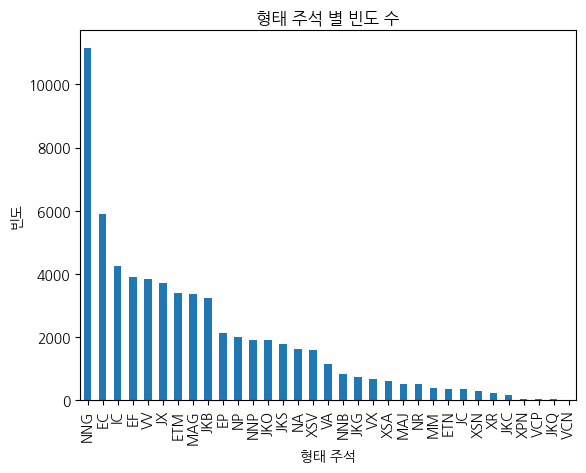

In [25]:
## 데이터 분석 - EDA

### 데이터프레임의 각 열의 데이터 타입 확인
# print(df_data.dtypes)

### null 데이터 확인
# print(df_data.isnull().sum())

### '형태 주석' 빈도
pos_freq = df_data['형태 주석'].value_counts()
pos_freq.plot(kind='bar')
plt.title('형태 주석 별 빈도 수')
plt.xlabel('형태 주석')
plt.ylabel('빈도')
plt.show()


### 표본정보 및 어휘 목록 전처리

표본 정보
- 표본 ID, 어절, 한국어 등급, 학습 기간

어휘 목록
- 어휘, 품사, 등급

분석할 정보
- '표본 번호', '등급' 별 품사 비율 평균
- '표본 번호', '등급' 별 어휘 목록 내 NNG 비율


In [26]:

import openpyxl 

df_example_org = pd.DataFrame()
df_voca_org = pd.DataFrame()

df_example_org = pd.read_excel("./2015~2022 학습자 말뭉치 표본 정보.xlsx", keep_default_na=False)
df_voca_org = pd.read_excel("./2017년 국제 통용 한국어 표준 교육과정 적용 연구(4단계) 어휘, 문법 등급 목록.xlsx", keep_default_na=False)

## 필요한 column 가져오기
df_example_org.info()
df_example = df_example_org[['표본ID', '어절', '한국어 등급', '학습 기간']]
df_example.info()

df_voca_org.info()
df_voca = df_voca_org[['어휘', '품사', '등급']]
df_voca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   표본ID      41020 non-null  int64 
 1   구축시기(형태)  41020 non-null  object
 2   구축시기(오류)  41020 non-null  object
 3   학습 환경     41020 non-null  object
 4   자료 유형     41020 non-null  object
 5   작문유형      41020 non-null  object
 6   장르        41020 non-null  object
 7   주제        41020 non-null  object
 8   어절        41020 non-null  int64 
 9   수집 대상     41020 non-null  object
 10  학습자 유형    41020 non-null  object
 11  한국어 등급    41020 non-null  object
 12  국적        41020 non-null  object
 13  교포 여부     41020 non-null  object
 14  거주 기간     41020 non-null  object
 15  학습 기간     41020 non-null  object
 16  학습 목표     41020 non-null  object
 17  모국어       41020 non-null  object
 18  기타 언어 1   41020 non-null  object
 19  기타 언어 2   41020 non-null  object
 20  기타 언어 3   41020 non-null  object
dtypes: int64(2),

In [27]:
## 한국어 등급 전처리
df_example['한국어 등급'].unique()
if df_example['한국어 등급'].dtype == 'object':
    print(df_example['한국어 등급'].dtype)
    df_example.loc[:,'한국어 등급'] = df_example['한국어 등급'].replace('정보 없음', 8)
    df_example.loc[:,'한국어 등급'] = df_example['한국어 등급'].replace('6급 이상', 7)
    df_example.loc[:,'한국어 등급'] = df_example['한국어 등급'].str.replace('급', '')
    df_example['한국어 등급'] = df_example['한국어 등급'].astype('Int64')
    print(df_example['한국어 등급'].dtype)

### 학습 기간 전처리
df_example['학습 기간'].unique()
if df_example['학습 기간'].dtype == 'object':
    print(df_example['학습 기간'].dtype)
    df_example.loc[:,'학습 기간'] = df_example['학습 기간'].str.replace('개월', '')
    df_example['학습 기간'] = df_example['학습 기간'].astype('float')
    print(df_example['학습 기간'].dtype)

df_example.info()

object
Int64
object
float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   표본ID    41020 non-null  int64  
 1   어절      41020 non-null  int64  
 2   한국어 등급  40710 non-null  Int64  
 3   학습 기간   41020 non-null  float64
dtypes: Int64(1), float64(1), int64(2)
memory usage: 1.3 MB


/var/folders/vh/wgjlwk2j6t71n3_l5yz6vqfc0000gn/T/ipykernel_34012/3930170604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['한국어 등급'] = df_example['한국어 등급'].astype('Int64')
/var/folders/vh/wgjlwk2j6t71n3_l5yz6vqfc0000gn/T/ipykernel_34012/3930170604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['학습 기간'] = df_example['학습 기간'].astype('float')


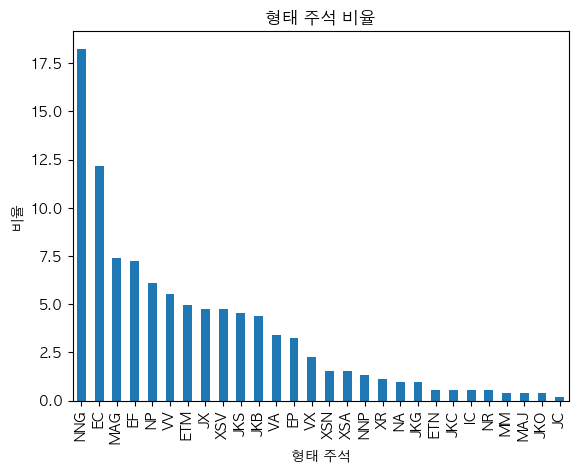

In [28]:
## 표본 번호의 형태 주석 비율
example_num = df_data['표본 번호'].unique()[0]
select_example = df_data[df_data['표본 번호'] == example_num]

from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
select_pos_ratio = select_example['형태 주석'].value_counts()
select_pos_ratio = select_pos_ratio / select_pos_ratio.sum() * 100
select_pos_ratio.plot(kind='bar')
plt.title('형태 주석 비율')
plt.xlabel('형태 주석')
plt.ylabel('비율')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62835 entries, 0 to 62834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   62835 non-null  int64 
 1   형태 주석   62503 non-null  object
 2   한국어 등급  62835 non-null  Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 1.5+ MB


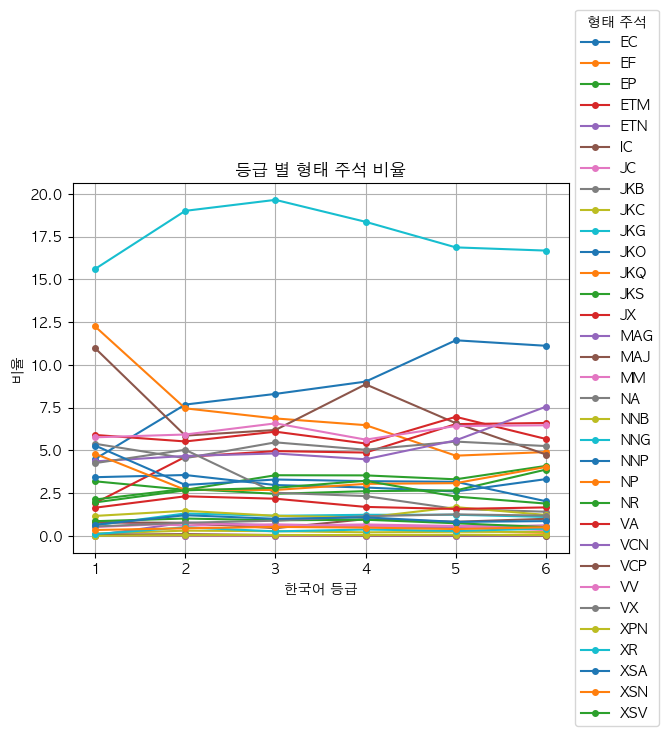

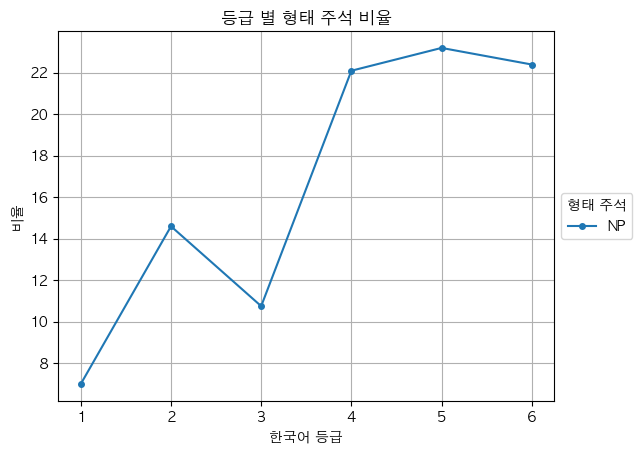

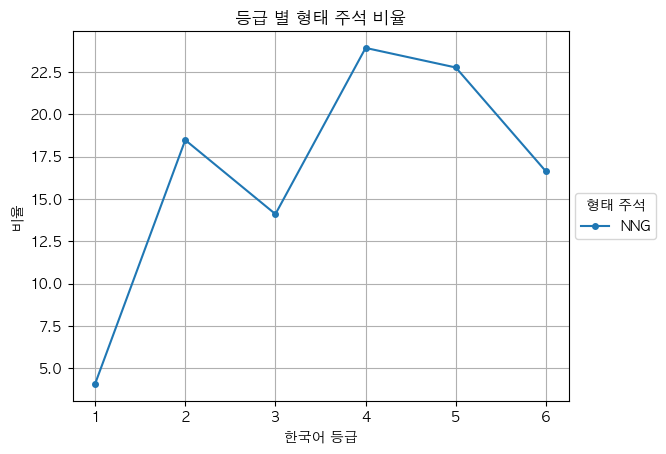

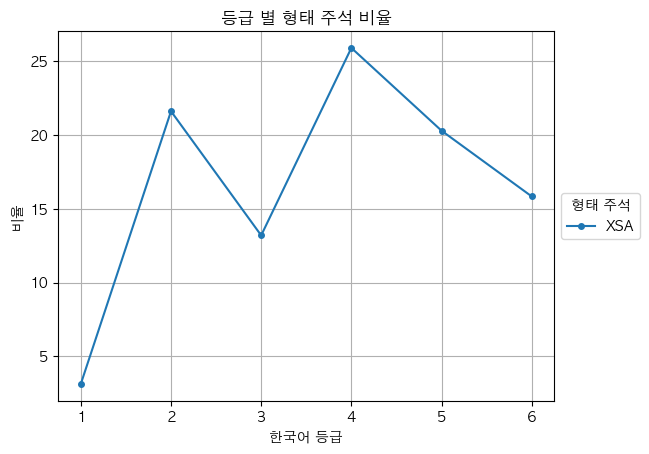

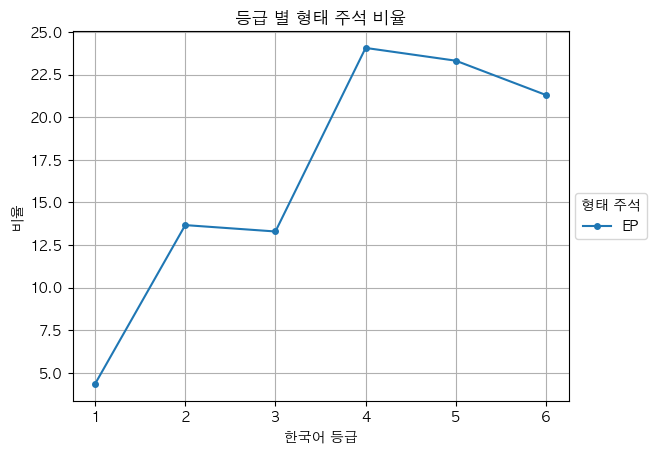

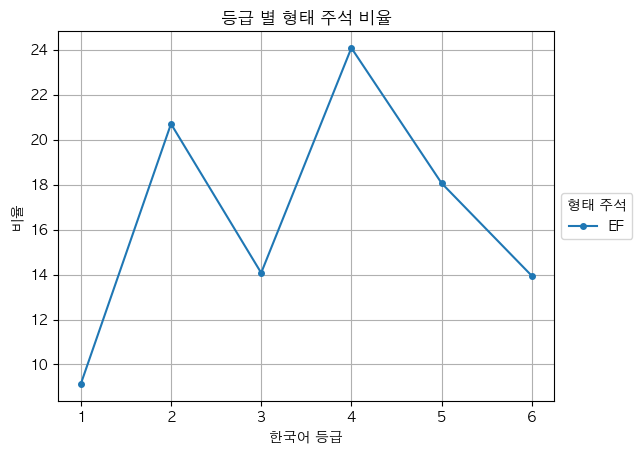

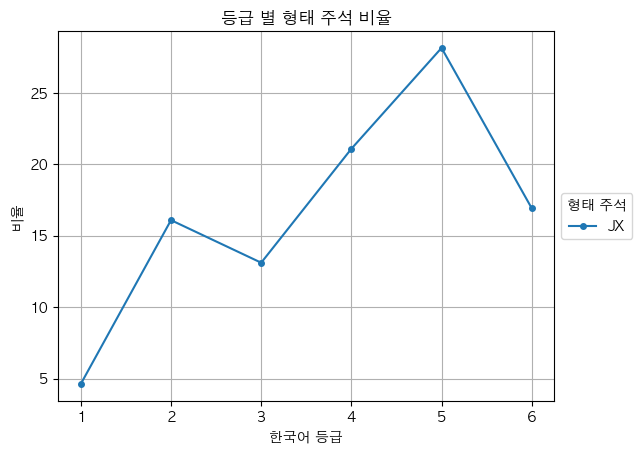

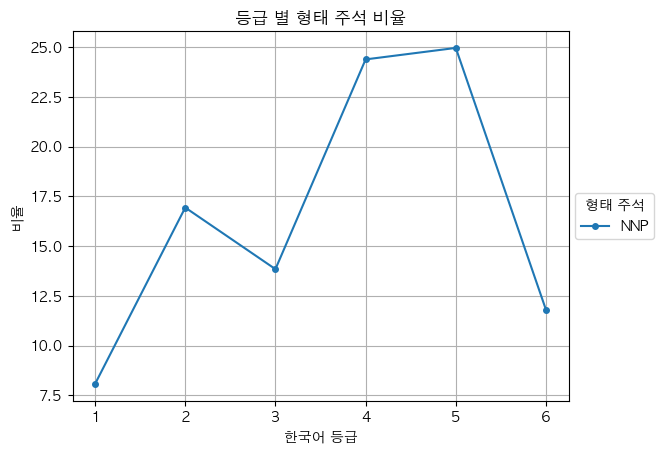

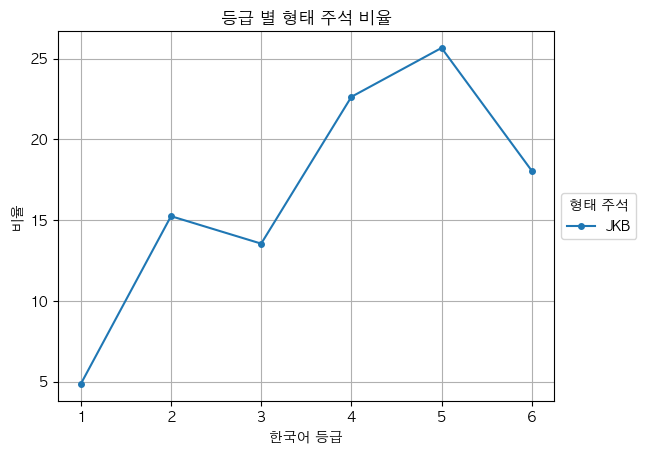

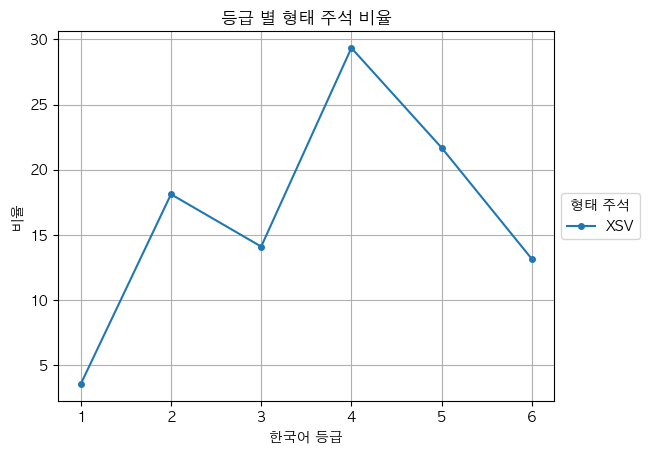

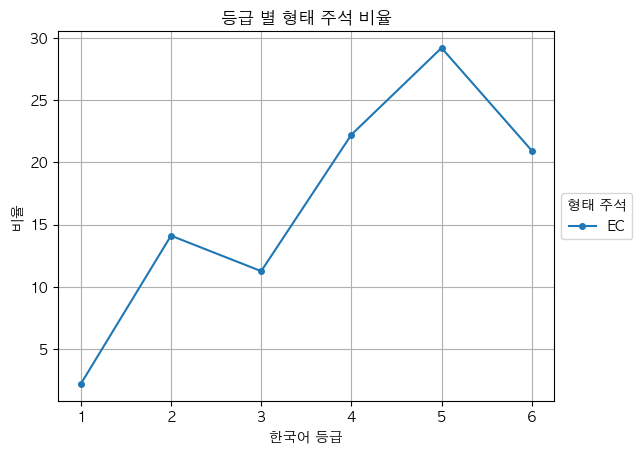

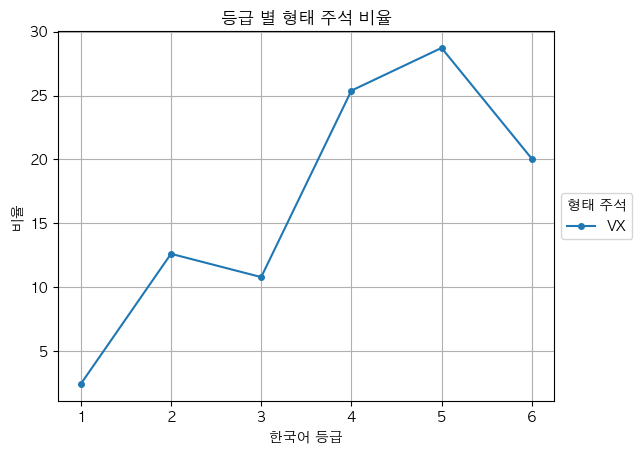

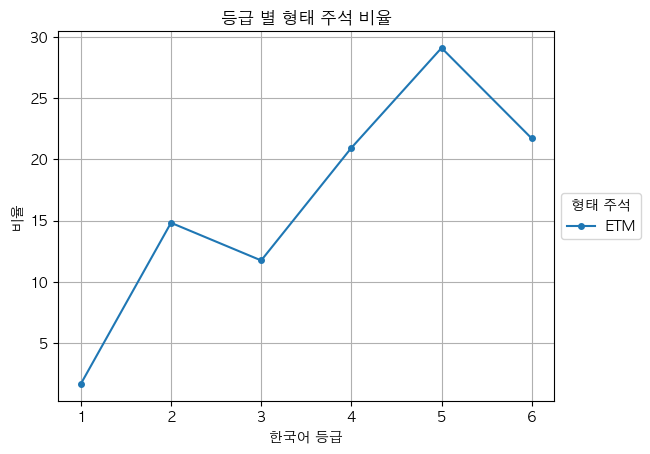

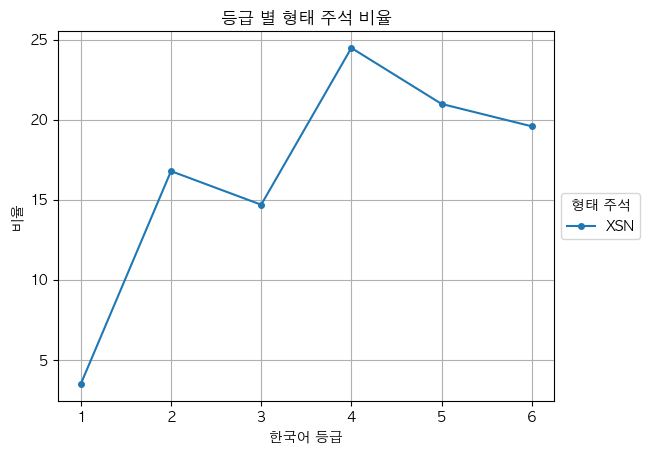

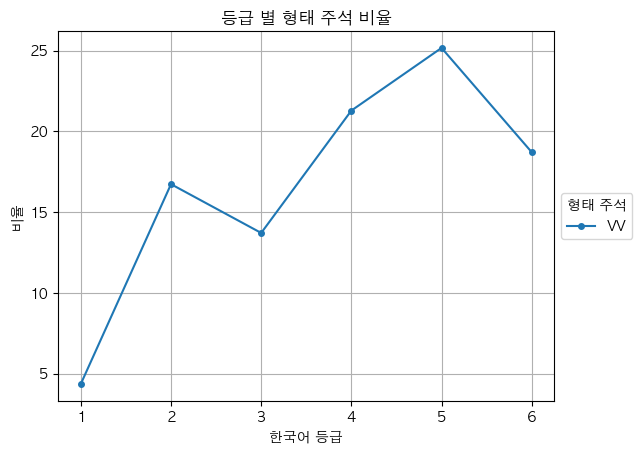

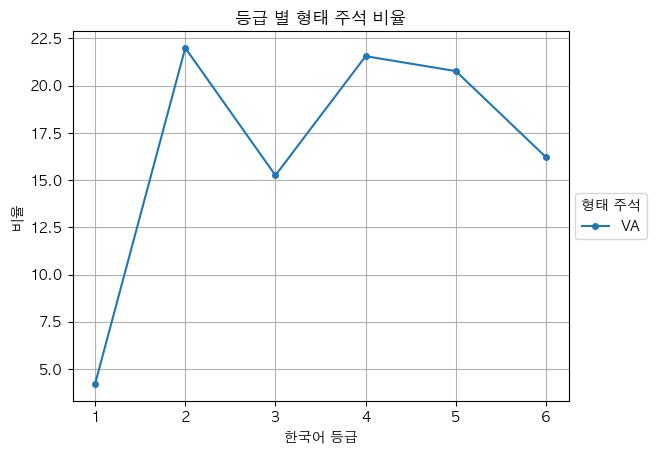

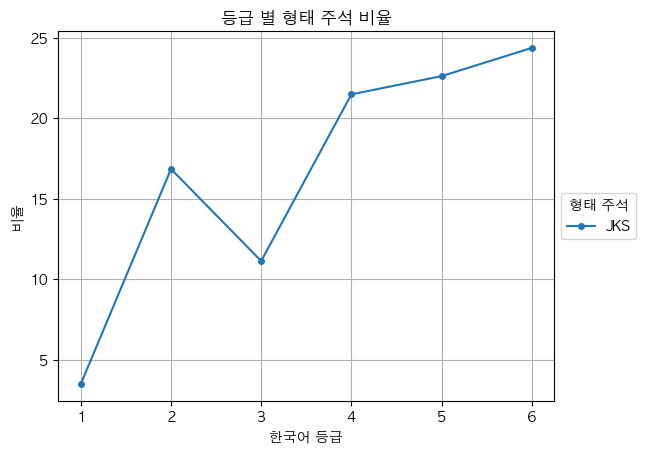

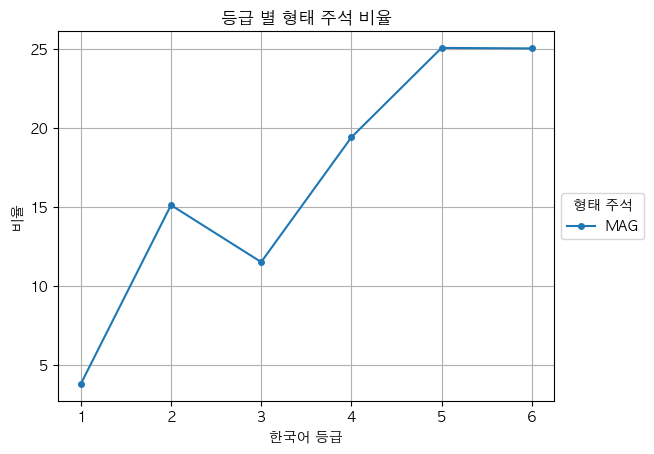

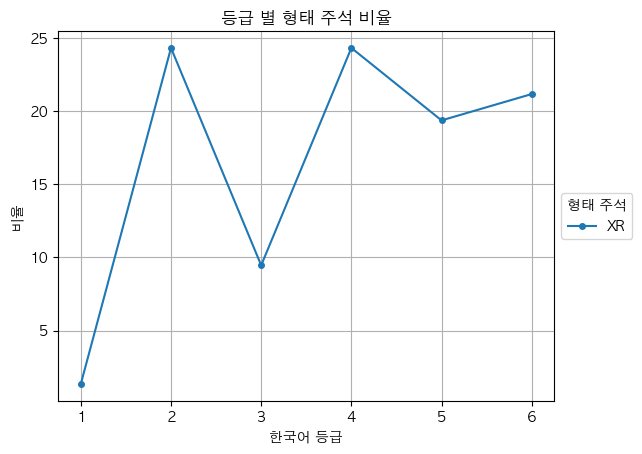

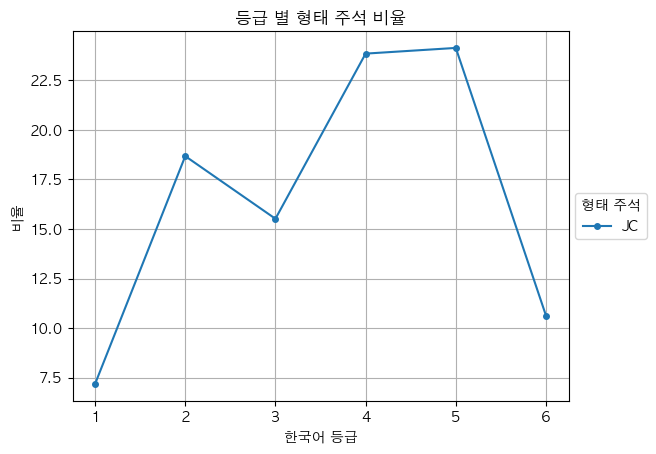

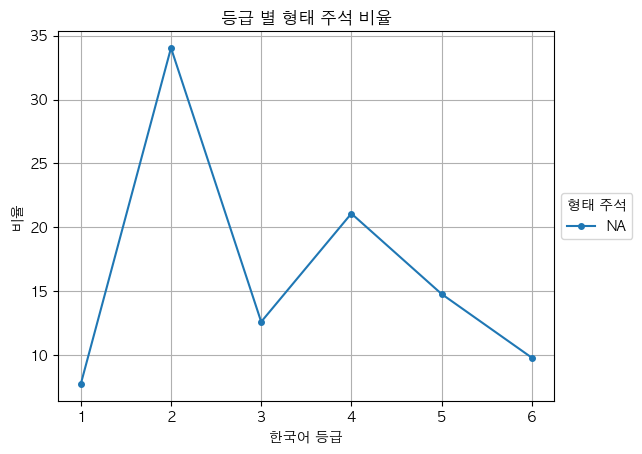

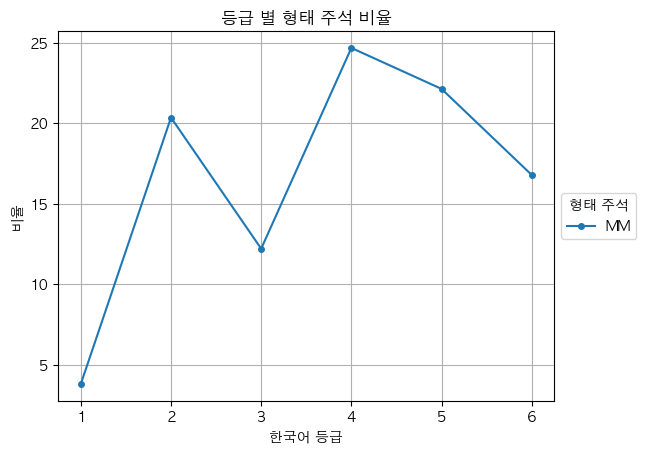

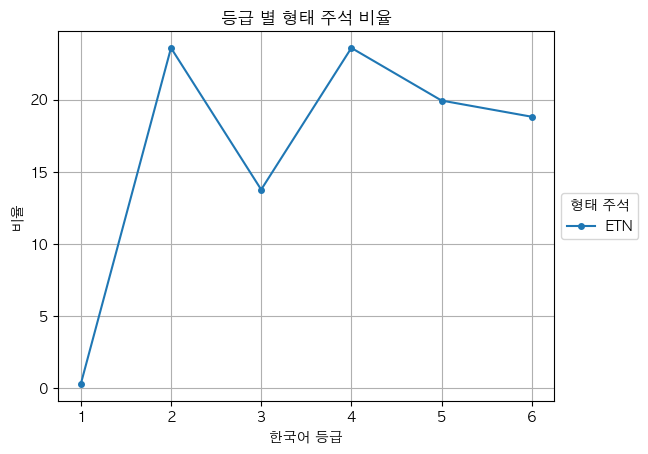

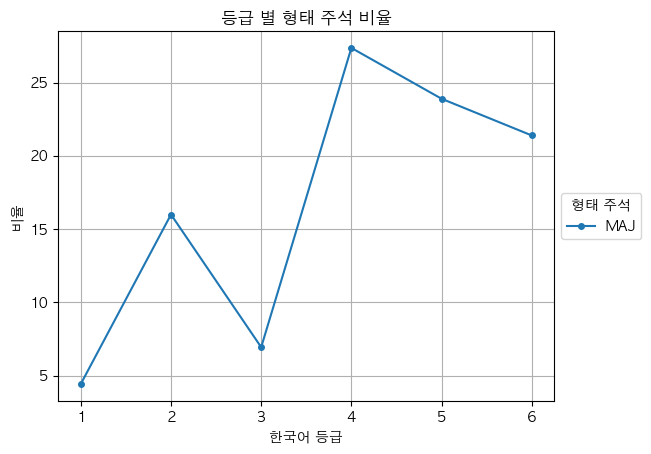

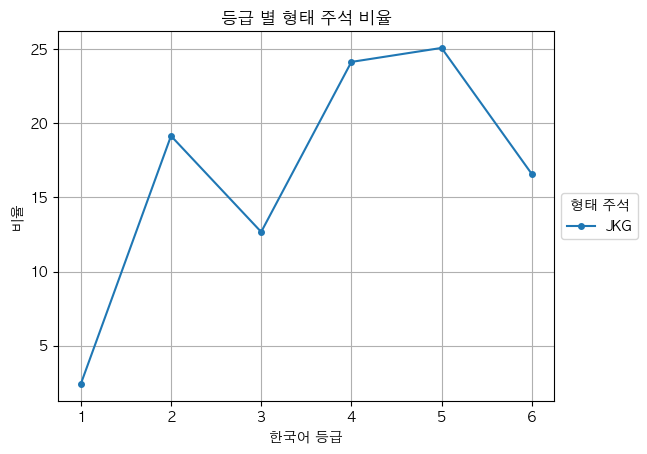

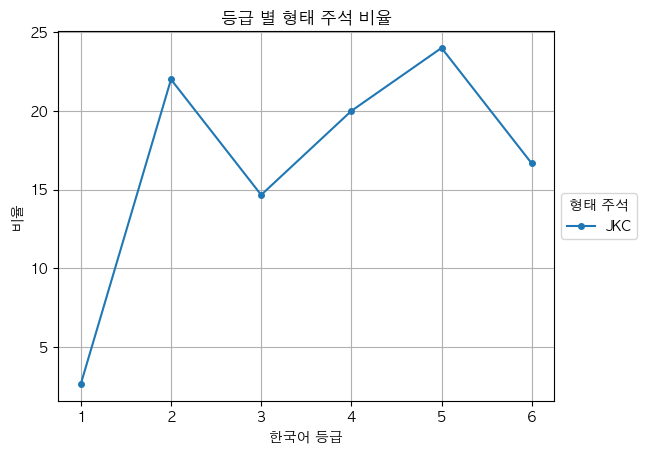

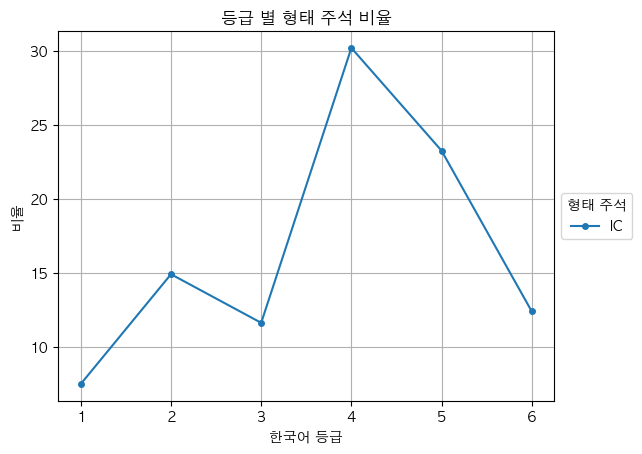

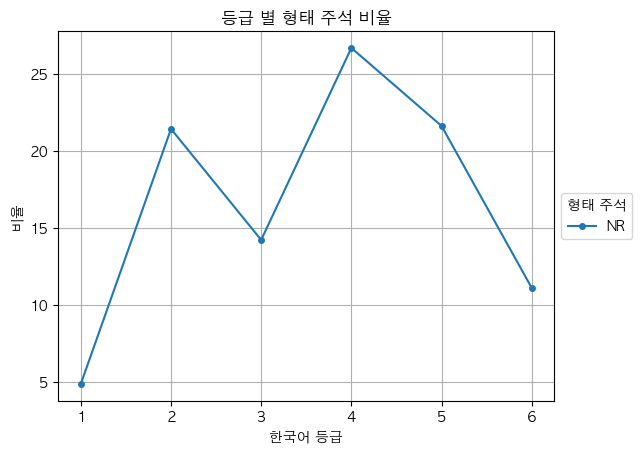

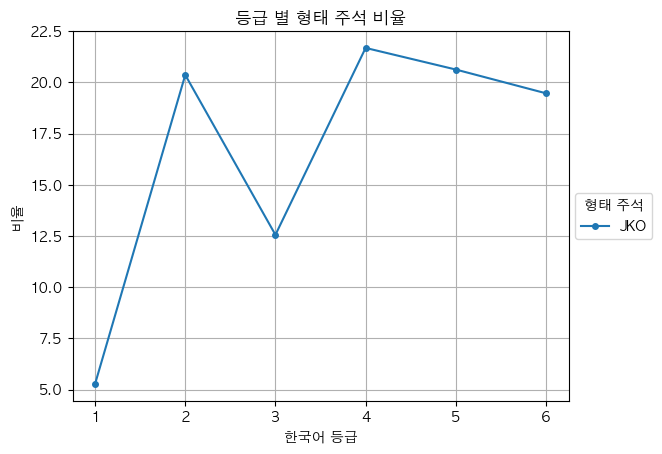

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


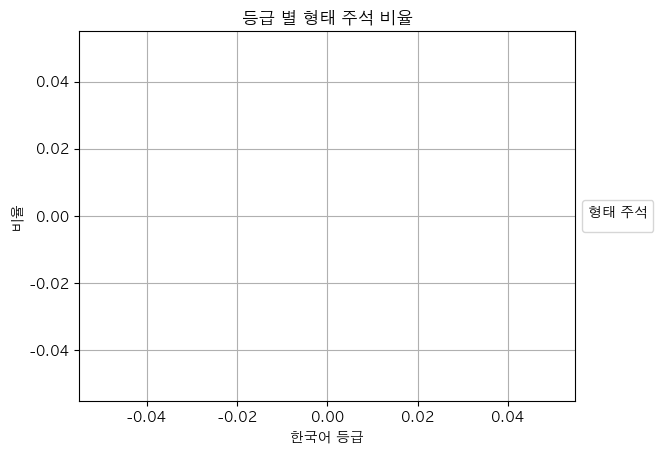

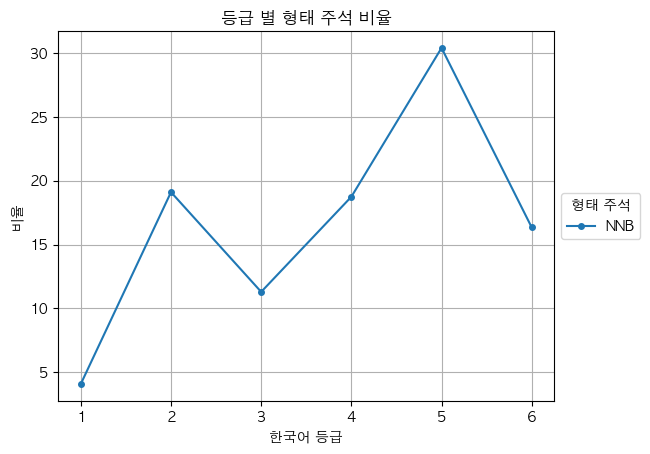

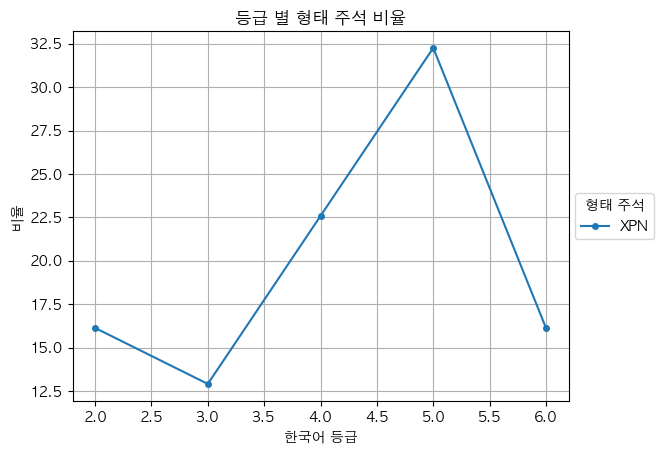

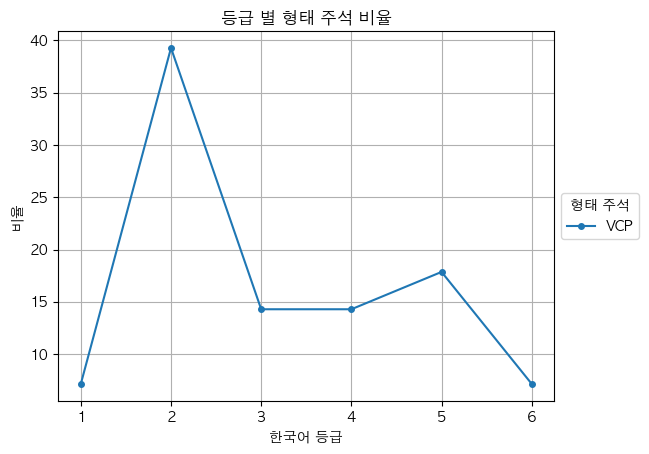

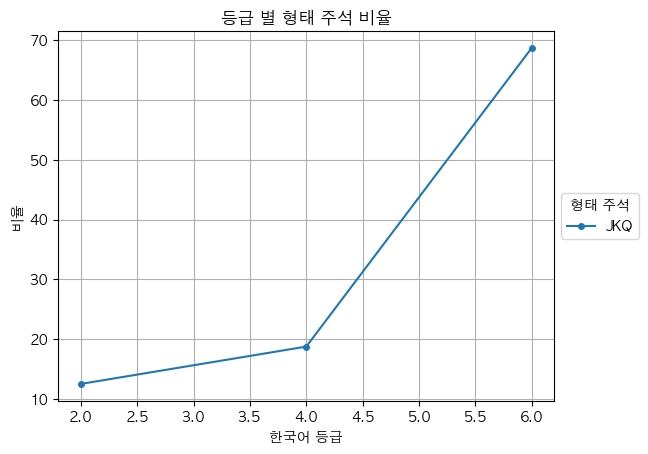

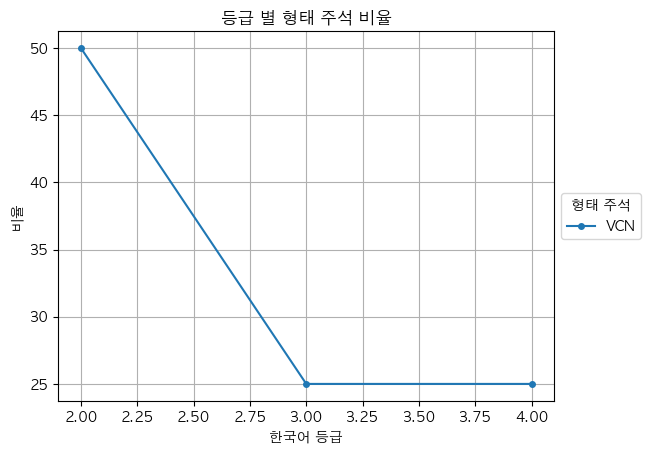

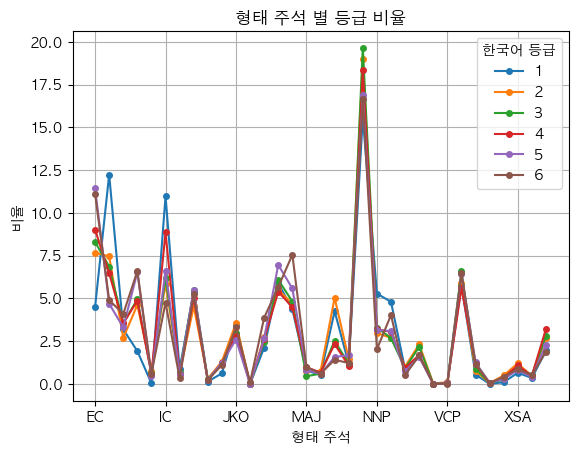

In [29]:
## 등급 별 형태 주석 비율 평균

df_example = df_example.rename(columns={'표본ID':'표본 번호'})

# print(df_data[['표본 번호','형태 주석']].info())
# print(df_example[['표본 번호','한국어 등급']].info())
merged_df = df_data[['표본 번호','형태 주석']].merge(df_example[['표본 번호','한국어 등급']], on='표본 번호', how='left')
merged_df.info()

grouped = merged_df.groupby(['한국어 등급', '형태 주석']).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 꺽은선 그래프 그리기
grouped.plot(kind='line', marker='o', markersize=4)
plt.title('등급 별 형태 주석 비율')
plt.xlabel('한국어 등급')
plt.ylabel('비율')
plt.legend(title='형태 주석', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### 범례
legends = df_data['형태 주석'].unique()

# 각 형태 주석별로 그래프 그리기
for legend in legends:
    # 데이터를 필터링하여 형태 주석에 해당하는 데이터만 선택
    legend_data = merged_df[merged_df['형태 주석'] == legend]
    
    # 등급별 형태 주석 비율 계산
    grouped2 = legend_data.groupby(['한국어 등급']).size()
    total = grouped2.sum()
    percentages = (grouped2 / total) * 100
    
    # 꺽은선 그래프 그리기
    percentages.plot(kind='line', marker='o', markersize=4, label=legend)

    # 그래프 설정
    plt.title('등급 별 형태 주석 비율')
    plt.xlabel('한국어 등급')
    plt.ylabel('비율')
    plt.legend(title='형태 주석', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

grouped = grouped.transpose()

# 꺽은선 그래프 그리기
ax = grouped.plot(kind='line', marker='o', markersize=4)

# 범례 설정
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, title='한국어 등급', loc='upper right')
plt.title('형태 주석 별 등급 비율')
plt.xlabel('형태 주석')
plt.ylabel('비율')
plt.grid(True)
plt.show()

In [30]:
## 어휘 목록 전처리
df_voca
df_voca['어휘'] = df_voca['어휘'].replace(r'\d+', '', regex=True)
voca_list = df_voca['어휘'].unique()
print(voca_list)

if df_voca['등급'].dtype == 'object':
    print(df_voca['등급'].dtype)
    df_voca.loc[:,'등급'] = df_voca['등급'].replace('정보 없음', 8)
    df_voca.loc[:,'등급'] = df_voca['등급'].replace('6급 이상', 7)
    df_voca.loc[:,'등급'] = df_voca['등급'].str.replace('급', '')
    df_voca['등급'] = df_voca['등급'].astype('Int64')
    print(df_voca['등급'].dtype)

['가게' '가격' '가구' ... '힐끗' '힘겹다' '힘입다']
object
Int64


/var/folders/vh/wgjlwk2j6t71n3_l5yz6vqfc0000gn/T/ipykernel_34012/2217332849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voca['어휘'] = df_voca['어휘'].replace(r'\d+', '', regex=True)
/var/folders/vh/wgjlwk2j6t71n3_l5yz6vqfc0000gn/T/ipykernel_34012/2217332849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voca['등급'] = df_voca['등급'].astype('Int64')


In [31]:
## 표본 번호 내 어휘 목록 단어 비율
voca_num = df_data['표본 번호'].unique()[0]

select_voca = df_data[df_data['표본 번호'] == voca_num]
select_cnt = select_voca['원 형태소'].value_counts()

select_voca = select_voca[select_voca['원 형태소'].isin(voca_list)]
select_voca_cnt = select_voca['원 형태소'].value_counts()

print( voca_num, select_voca_cnt.sum() / select_cnt.sum() * 100 )

32643 51.71102661596958


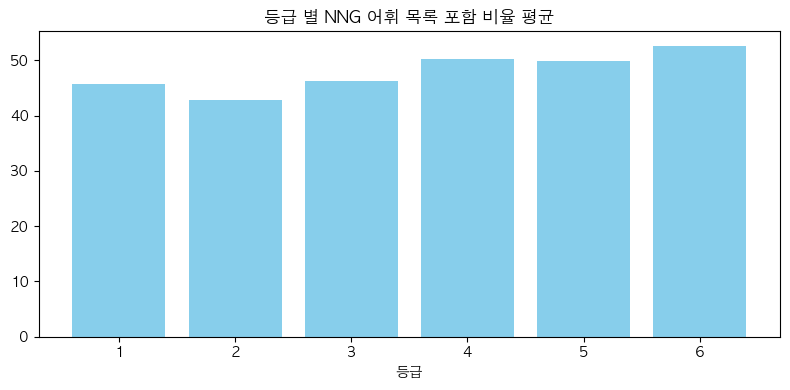

In [32]:
## 등급 별 어휘 목록 단어 비율 평균

# print(df_data[['표본 번호','형태 주석']].info())
# print(df_example[['표본 번호','한국어 등급']].info())
merged_voca_df = df_data[['표본 번호','원 형태소']].merge(df_example[['표본 번호','한국어 등급']], on='표본 번호', how='left')
# merged_voca_df.info()

voca_rank = {}
for i in range(1,7):
    select_voca = merged_voca_df[merged_voca_df['한국어 등급'] == i]
    select_cnt = select_voca['원 형태소'].value_counts()

    select_voca = select_voca[select_voca['원 형태소'].isin(voca_list)]
    select_voca_cnt = select_voca['원 형태소'].value_counts()

    # print( str(i)+"등급", select_voca_cnt.sum() / select_cnt.sum() * 100 )
    voca_rank[i] = select_voca_cnt.sum() / select_cnt.sum() * 100

# 막대 그래프를 그리기 위해 데이터를 추출
categories = list(voca_rank.keys())
values = list(voca_rank.values())

# 그래프 생성
plt.figure(figsize=(8, 4))
plt.bar(categories, values, color='skyblue')
plt.xlabel('등급')
plt.title('등급 별 NNG 어휘 목록 포함 비율 평균')

plt.tight_layout()  # 그래프가 잘리지 않도록 조정
plt.show()

In [33]:
! pip3 install symspellpy-ko


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [34]:
from symspellpy_ko import KoSymSpell, split_syllables, join_jamos, Verbosity

# create 

def sym_spell():
    sp = KoSymSpell()
    sp.load_korean_dictionary(decompose_korean=True, load_bigrams=True)
    return sp

def test_lookup(sym_spell, term):
    lookup = sym_spell.lookup(term, Verbosity.CLOSEST)[0]
    assert lookup.term == "안녕하세요"
    assert lookup.distance == 1

In [35]:
sp = sym_spell()

lookup = sp.lookup("안뇽하십니까", Verbosity.CLOSEST)[0].term

print(lookup)

안녕하십니까


In [36]:
def get_pronunciation_score(text):
    fixed_text = sp.lookup(text, Verbosity.CLOSEST)[0].term
    # count how many characters are different
    score = 0
    for i in range(len(text)):
        if text[i] in fixed_text:
            score += 1
    return score
    
get_pronunciation_score("안늉하세요")



4